# Load Data and Compute 3 Broad Temperament Factors

Broad temperament factors are computed based on the CFA.

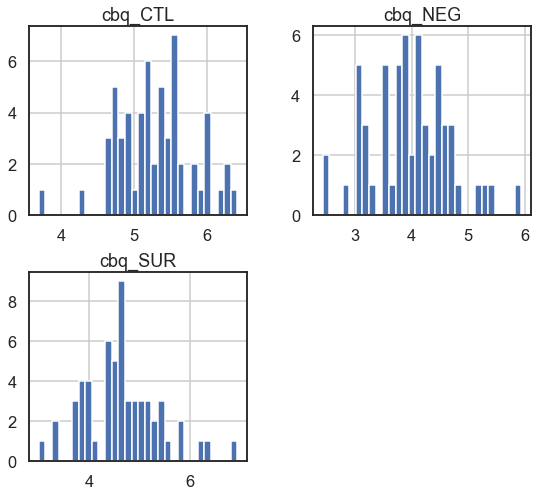

In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk', style='white')
file = '../scripts/ChEC_scores_combined_withnirs_std_20200406.csv'
data = read_csv(file,index_col=0,skipinitialspace=True)
data['cbq_NEG'] = (data['cbqsf_angfrus'] + data['cbqsf_sad'] + data['cbqsf_fear'] + data['cbqsf_discomf'] + (8-data['cbqsf_fallreact']))/5
data['cbq_SUR'] = (data['cbqsf_activity'] + data['cbqsf_approach'] + data['cbqsf_hip'] + data['cbqsf_impulsivity'] + (8-data['cbqsf_shy']))/5
data['cbq_CTL'] = (data['cbqsf_inhibctl'] + data['cbqsf_percepsens'] + data['cbqsf_attenfoc'] + data['cbqsf_lip'] + data['cbqsf_fallreact'] + data['cbqsf_smilelaugh'])/6

factor_scores = data.loc[:,['cbq_NEG','cbq_SUR','cbq_CTL']]
factor_scores.hist(bins=30, figsize=(9,8))
plt.show()

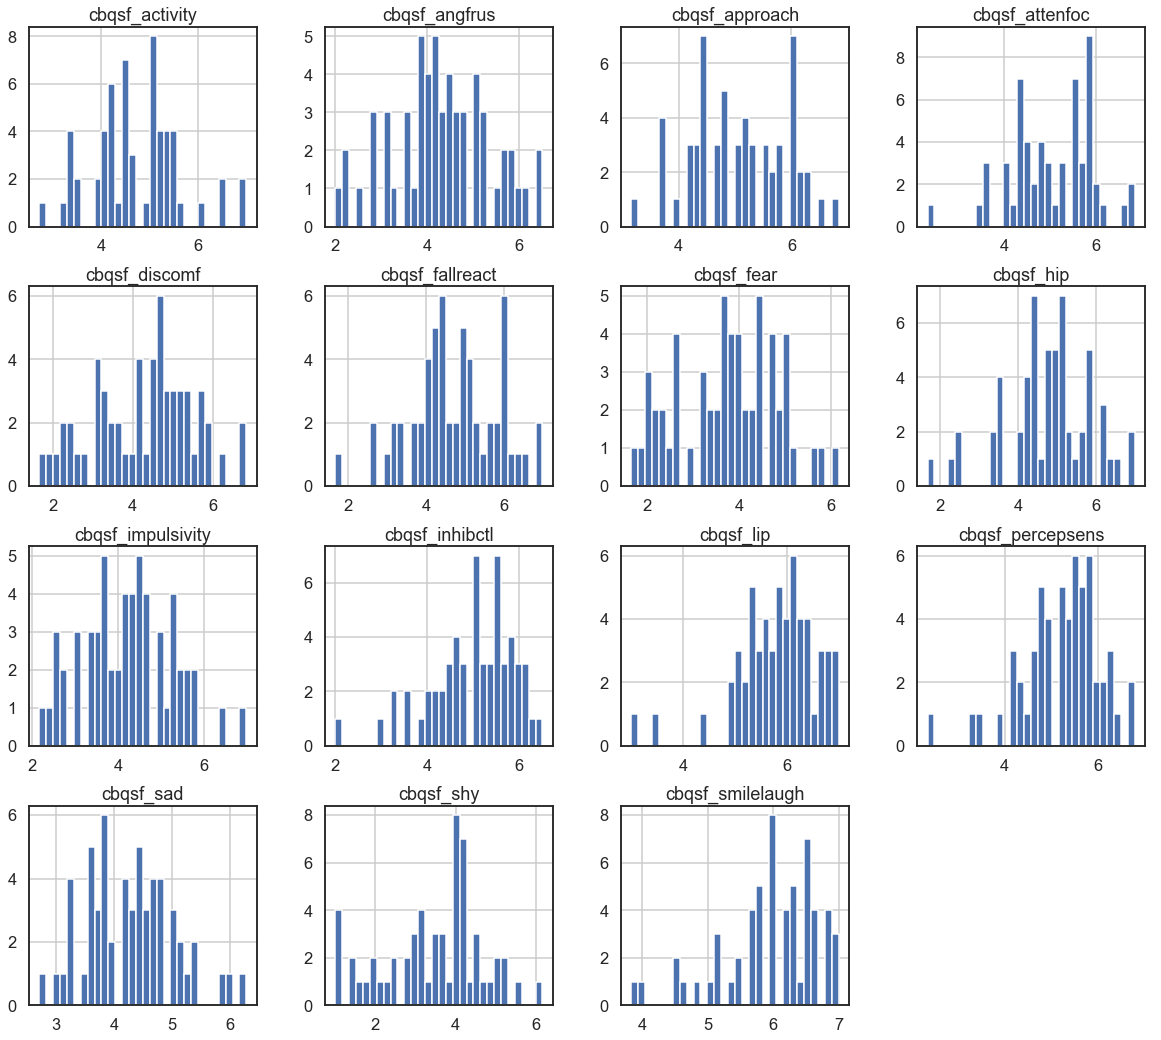

In [3]:
cbq_data = data.loc[:,['cbqsf_activity','cbqsf_angfrus', 'cbqsf_approach', 'cbqsf_attenfoc', 'cbqsf_discomf',
                       'cbqsf_fallreact', 'cbqsf_fear', 'cbqsf_hip', 'cbqsf_impulsivity',
                       'cbqsf_inhibctl', 'cbqsf_lip', 'cbqsf_percepsens', 'cbqsf_sad','cbqsf_shy', 'cbqsf_smilelaugh']]
cbq_data.hist(bins=30, figsize=(20,18))
plt.savefig('supp_plot_CBQSF_hists.svg')
plt.show()


<Figure size 432x288 with 0 Axes>

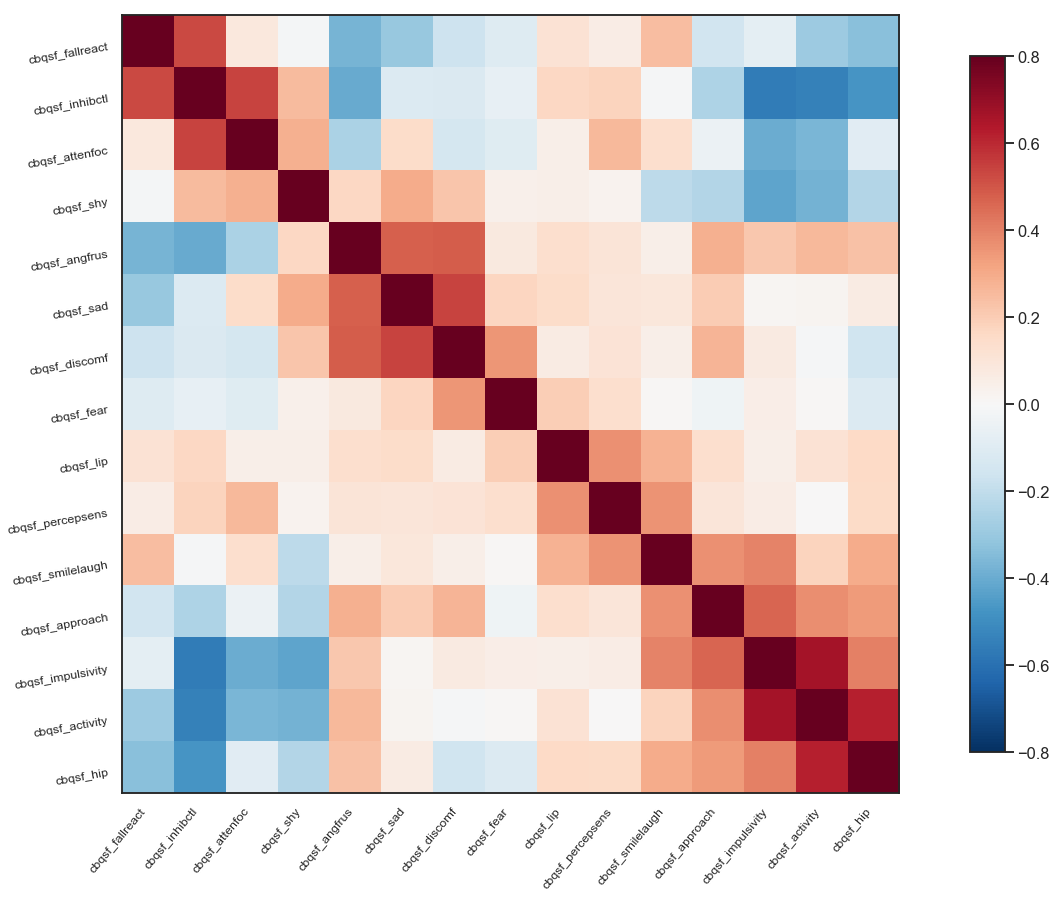

In [4]:
from nilearn import plotting

corr = cbq_data.corr()
plt.figure()
plotting.plot_matrix(corr.values, figure=(16,16), labels= corr.columns,
                     vmax=0.8, vmin=-0.8, reorder=True)

## Eye tracker data of interest and temperamental negative affectivity
Compute correlations between our data of interest and plot the associations.

In [ ]:
for c in data.columns:
    print(c)

In [5]:
from scipy.stats import spearmanr

emotions = ['Angry','Happy']
aois = ['mouth','eye']

for e in emotions:
    for a in aois:
        r,p = spearmanr(data['{0}_Face_{1}_firstfix'.format(e,a)],data['cbq_NEG'],nan_policy='omit')
        print('{0} condition, {1} area is R={2}, p={3}.'.format(e,a,round(r,3),round(p,4)))

Angry condition, mouth area is R=-0.224, p=0.1147.
Angry condition, eye area is R=-0.044, p=0.7505.
Happy condition, mouth area is R=-0.489, p=0.0002.
Happy condition, eye area is R=-0.089, p=0.5152.


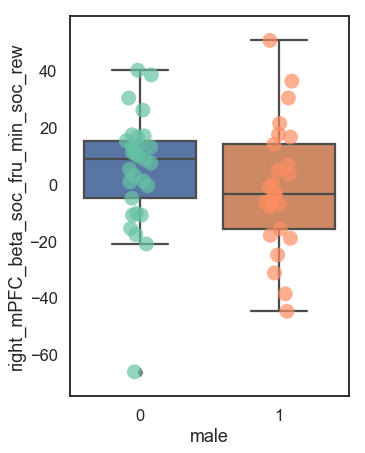

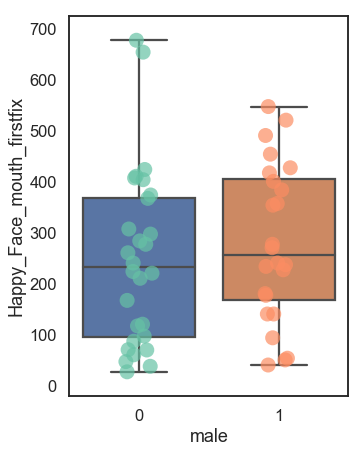

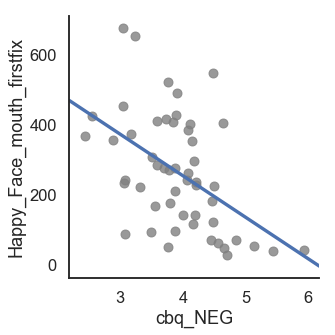

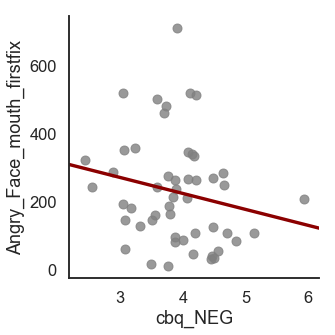

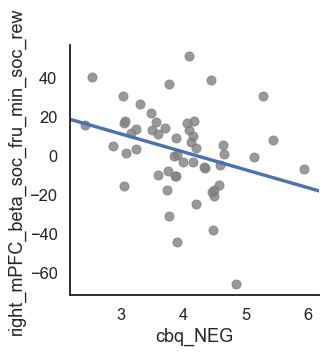

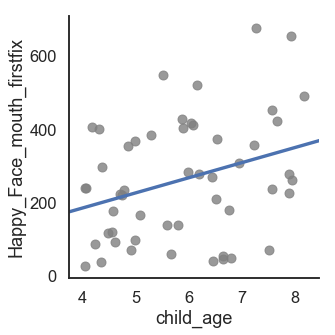

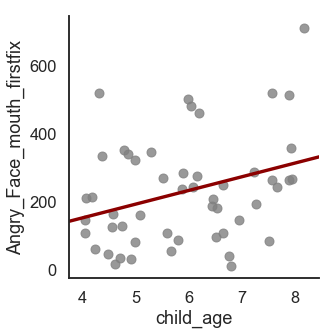

In [10]:
plt.figure(figsize=(5,7))
ax = sns.boxplot(x='male',y='right_mPFC_beta_soc_fru_min_soc_rew',hue='male',data=data,dodge=False)
ax = sns.stripplot(x='male',y='right_mPFC_beta_soc_fru_min_soc_rew',palette='Set2',marker='o',data=data,size=15,alpha=0.7,dodge=False)
plt.legend().remove()
plt.savefig('male_socfru.svg')
plt.show()
plt.close()

plt.figure(figsize=(5,7))
ax = sns.boxplot(x='male',y='Happy_Face_mouth_firstfix',hue='male',data=data,dodge=False)
ax = sns.stripplot(x='male',y='Happy_Face_mouth_firstfix',palette='Set2',marker='o',data=data,size=15,alpha=0.7,dodge=False)
plt.legend().remove()
plt.savefig('male_HapDwell.svg')
plt.show()
plt.close()

sns.lmplot('cbq_NEG','Happy_Face_mouth_firstfix',data,ci=None,scatter_kws={'color':'gray'})
plt.savefig('NEG_hap_mouth.svg')
plt.show()
plt.close()

sns.lmplot('cbq_NEG','Angry_Face_mouth_firstfix',data,ci=None, 
           line_kws={'color': 'darkred'}, scatter_kws={'color':'gray'})
plt.savefig('NEG_ang_mouth.svg')
plt.show()
plt.close()

sns.lmplot('cbq_NEG','right_mPFC_beta_soc_fru_min_soc_rew',data,ci=None, scatter_kws={'color':'gray'})
plt.savefig('NEG_socfru.svg')
plt.show()
plt.close()

sns.lmplot('child_age','Happy_Face_mouth_firstfix',data,ci=None,scatter_kws={'color':'gray'})
plt.savefig('AGE_hap_mouth.svg')
plt.show()
plt.close()

sns.lmplot('child_age','Angry_Face_mouth_firstfix',data,ci=None, 
           line_kws={'color': 'darkred'}, scatter_kws={'color':'gray'})
plt.savefig('AGE_ang_mouth.svg')
plt.show()
plt.close()